<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/1121_%EA%B3%BC%EC%A0%9C_boston_house_price_prediction_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 p.303~310

## 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측



---

선형 모델 중 규제가 적용되지 않은 선형 회귀를 LinearRegression을 이용해 보스턴 주택 가격 예측 회귀 구현

### LinearRegression 클래스 - Ordinary Least Squares

**LinearRegression** 클래스 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
  + fit() 메서드로 X,y 배열을 입력받으면 회귀 계수인 W를 **coef_** 속성에 저장



```
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```

* 입력 파라미터
  + fit_intercept : Intercept(절편) 값을 계산할 것인지 말지를 지정.(디폴트는 True/False이면 0으로 지정) 
  + normalize : True이면 회귀를 수행하기 전에 입력 데이터를 정규화.(디폴트는 False-파라미터 무시)
* 속성
  + coef_ : fit() 메서드 수행 시 회귀 계수가 배열 형태로 저장. Shape는 (Target 값 개수, 피처 개수).
  + intercept_ : intercept 값

* 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감 -> 다중 공선성(multi-collinearity) 문제
  + 독립적인 중요한 피처만 남기고 제거하거나 규제 적용. PCA를 통해 차원 축소 수행.

### 회귀 평가 지표

회귀 평가 지표 -> 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표.

단순히 차이 더하면 x => 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값

* 회귀 성능 평가 지표
  + MAE(Mean Absolute Error) : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것
  + MSE(Mean Squared Error) : 실제 값과 예측값의 차이를 제곱해 평균한 것
  + RMSE(Root Mean Squared Error) : MSE에 루트를 씌운 것. 사이킷런이 제공 x. 함수 직접 만들어야해
  + R^2 : 실제 값의 분산 대비 예측값의 분산 비율을 지표로. 1에 가까울수록 예측 정확도 높아
  + MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error) : MSE나 RMSE에 로그 적용.

* 평가 시 사용되는 scoring 파라미터의 적용 값
  + MAE - metrics.mean_absolute_error / 'neg_mean_absolute_error'
  + MSE - metrics.mean_squared_error / 'neg_mean_squared_error'
  + R^2 - metrics.r2_score / 'r2'

* **Scoring 함수에 회귀 평가 지표 적용할 때 유의할 점** : MAE의 'neg'표시는 음수 값 가진다는 의미 but 절댓값 합이므로 음수가 될 수 x. -> score 값이 클수록 좋은 평가 결과로 자동평가해 -> 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 **-1을 곱해** 보정.
  + 'neg_mean_absolute_error'가 의미하는 것은 -1*metrics.mean_absolute_error()이니 주의 필요

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

* 해당 피처에 대한 설명
  + CRIM : 지역별 범죄 발생률
  + ZN : 25,000평방피트를 초과하는 거주 지역의 비율
  + INDUS : 비상업 지역 넓이 비율
  + CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
  + NOX : 일산화질소 농도
  + RM : 거주할 수 있는 방 개수
  + AGE : 1940년 이전에 건축된 소유 주택의 비율
  + DIS : 5개 주요 고용센터까지의 가중 거리
  + RAD : 고속도로 접근 용이도
  + TAX : 10,000달러당 재산세율
  + PTRATIO : 지역의 교사와 학생 수 비율
  + B : 지역의 흑인 거주 비율
  + LSTAT : 하위 계층의 비율
  + MEDV : 본인 소유의 주택 가격(중앙값)

* 사이킷런은 보스턴 주택 가격 데이터 세트를 **load_boston()**을 통해 제공

* 해당 데이터 세트 로드. DataFrame으로 변경.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> 피처의 Null 값은 없으며 모두 float형.

* 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화
  + seaborn의 regplot() API는 X,Y축 값의 산점도와 함께 선형 회귀 직선.
  + matplotlib.subplots() 이용해 각 ax마다 칼럼과 PRICE의 관계 표현. 여러 개의 그래프 한번에 표현하기 위해 자주 사용

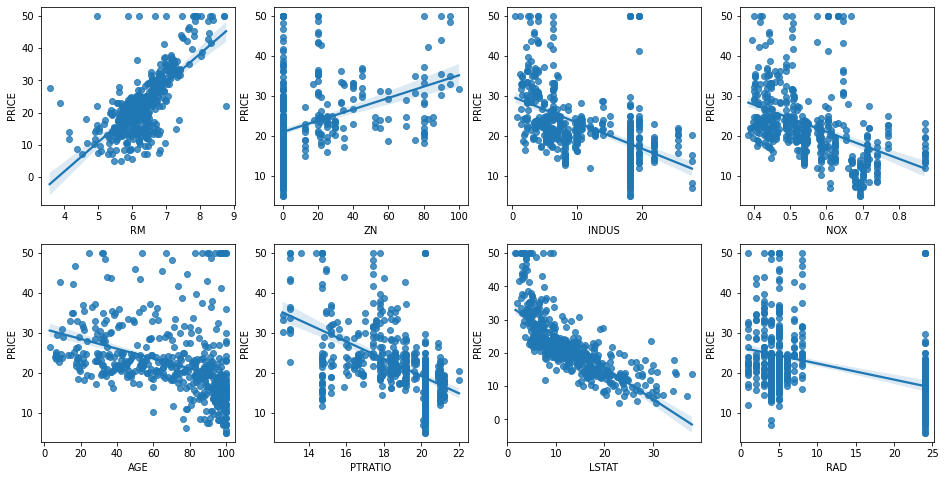

In [3]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

=> 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타나.(RM(방 개수)은 양 방향의 선형성 가장 커.LSTAT(하위 계층의 비율)는 음 방향의 선형성 가장 커)

* LinearRegression 클래스 이용해 보스턴 주택 가격의 회귀 모델 만들기
  + train_test_split() 이용해 학습과 테스트 데이터 세트 분리해 학습과 예측 수행
  + metrics 모듈의 **mean_squared_error()**와 **r2_score()** API 이용해 MSE와 R2 Score 측정

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


* 주택 가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값
  + 절편은 LinearRegression 객체의 **intercept_** 속성에, 회귀 계수는 **coef_** 속성에 값 저장

In [5]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


* 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력 - sort_values() 함수 이용

In [6]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

=> RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보여 -> 최적화 수행하면서 피처 coefficients의 변화 살펴보기

* 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정
  + scoring='neg_mean_squared_error' 지정하면 반환되는 수치 값은 음수 값.
  + 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델. 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델 => scoring 함수 호출하면 계산된 MSE값에 -1 곱해 반환
  + 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 돼
  + sqrt()함수를 적용해 RMSE를 구할 수 있다

In [8]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores : ',np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


=> 평균 RMSE는 약 5.829. cross_val_score(scoring="neg_mean_squared_error")로 반환된 값 확인해보면 모두 음수임을 확인.